# ML Result

* fnn
* fnn_rssi
* encoder
* encoder_rssi

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import torch
from torch.utils.data import Dataset, DataLoader
import matplotlib.pyplot as plt
from dataset import *

### loss/epoch

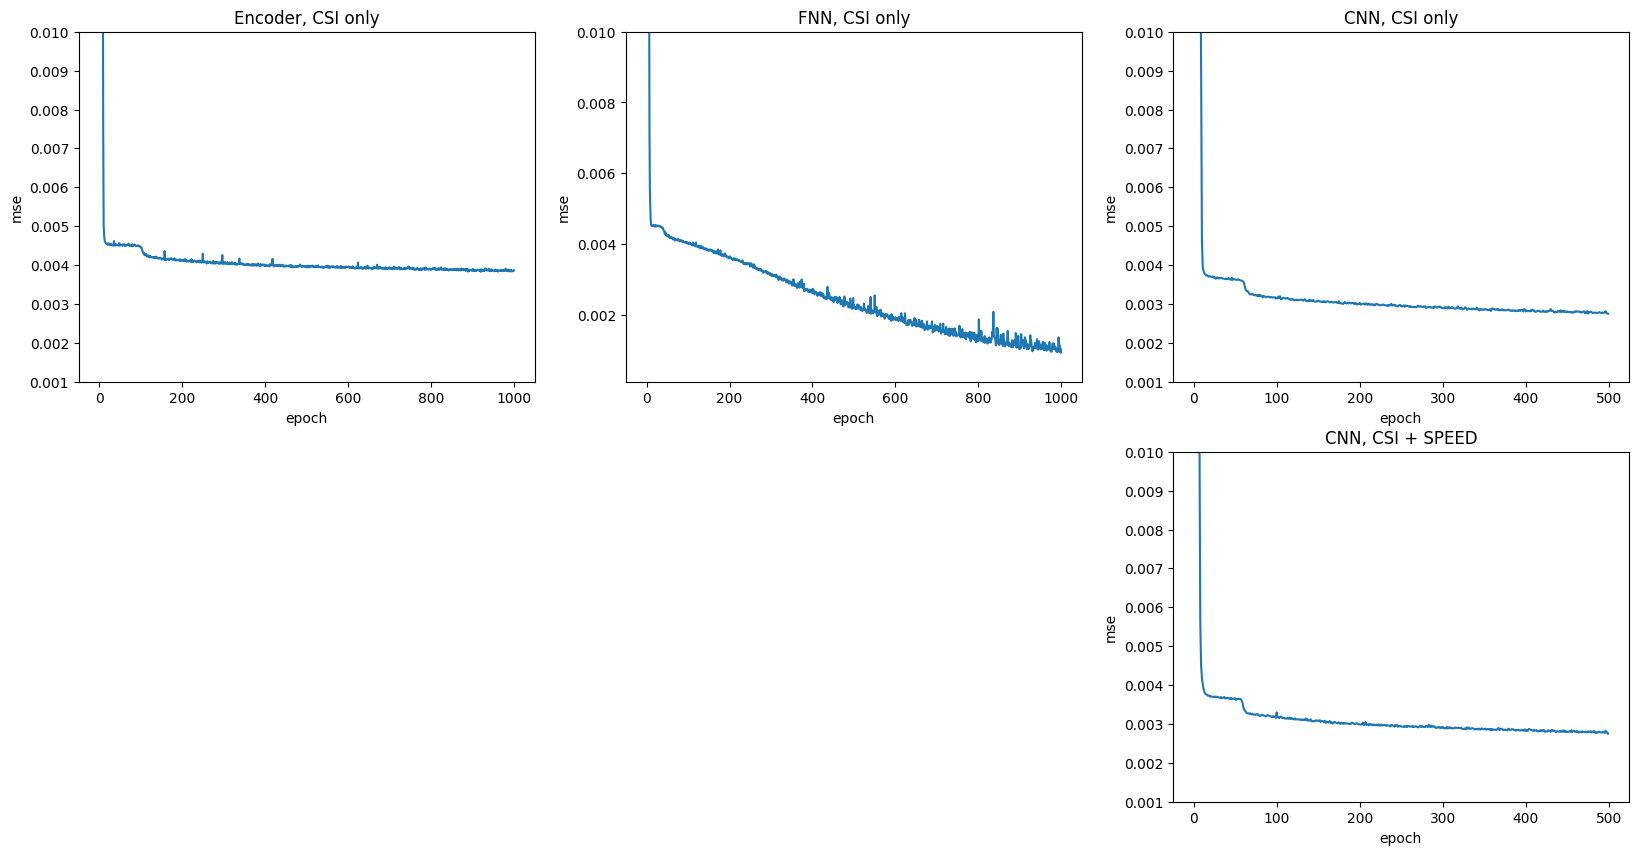

In [13]:
plt.figure(figsize=(20,10))

losses = np.load('encoder/losses.npy')
plt.subplot(2,3,1)
plt.ylim(0.001,0.01)
plt.plot(losses[0],losses[1])
plt.title('Encoder, CSI only')
plt.ylabel('mse')
plt.xlabel('epoch')

# losses = np.load('encoder_rssi/losses.npy')
# plt.subplot(2,3,4)
# plt.ylim(0.001,0.01)
# plt.plot(losses[0],losses[1])
# plt.title('Encoder, CSI + RSSI')
# plt.ylabel('mse')
# plt.xlabel('epoch')

losses = np.load('fnn/losses.npy')
plt.subplot(2,3,2)
plt.ylim(0.0001,0.01)
plt.plot(losses[0],losses[1])
plt.title('FNN, CSI only')
plt.ylabel('mse')
plt.xlabel('epoch')

# losses = np.load('fnn_rssi/losses.npy')
# plt.subplot(2,3,5)
# plt.ylim(0.001,0.01)
# plt.plot(losses[0],losses[1])
# plt.title('FNN, CSI + RSSI')
# plt.ylabel('mse')
# plt.xlabel('epoch')

losses = np.load('cnn_basic/losses.npy')
plt.subplot(2,3,3)
plt.ylim(0.001,0.01)
plt.plot(losses[0],losses[1])
plt.title('CNN, CSI only')
plt.ylabel('mse')
plt.xlabel('epoch')

losses = np.load('cnn_speed/losses.npy')
plt.subplot(2,3,6)
plt.ylim(0.001,0.01)
plt.plot(losses[0],losses[1])
plt.title('CNN, CSI + SPEED')
plt.ylabel('mse')
plt.xlabel('epoch')


plt.show()

Text(0.5, 0, 'epoch')

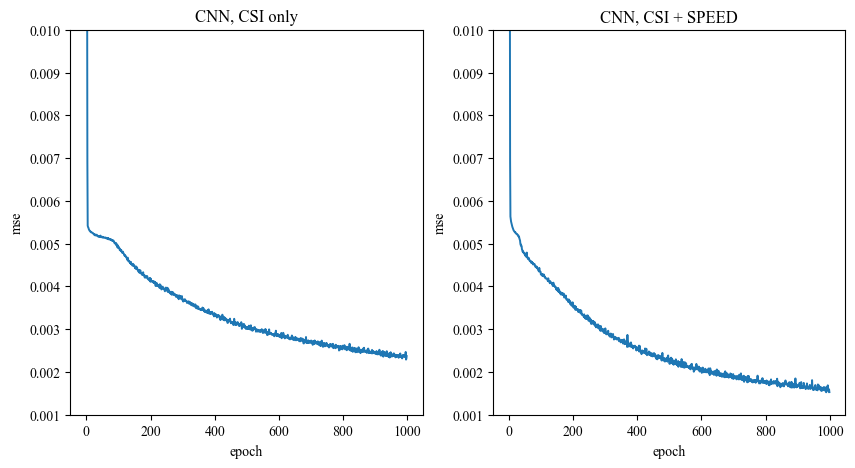

In [56]:
plt.figure(figsize=(10,5))

losses = np.load('cnn_basic/losses.npy')
plt.subplot(1,2,1)
plt.ylim(0.001,0.01)
plt.plot(losses[0],losses[1])
plt.title('CNN, CSI only')
plt.ylabel('mse')
plt.xlabel('epoch')

losses = np.load('cnn_speed/losses.npy')
plt.subplot(1,2,2)
plt.ylim(0.001,0.01)
plt.plot(losses[0],losses[1])
plt.title('CNN, CSI + SPEED')
plt.ylabel('mse')
plt.xlabel('epoch')

In [3]:
def dot_inter(x,y,inter,max,color = 'm',marker = '^'):
    for i in range(-1,max,inter):
        scatter = plt.scatter(x[i]+1,y[i],edgecolor=color, facecolor='white',marker=marker, s=100, alpha=1.0, zorder=2)

In [4]:
def smooth_curve(points, factor=0.7):
    smoothed_points = []
    for point in points:
        if smoothed_points:
            previous = smoothed_points[-1]
            smoothed_points.append(previous * factor + point * (1 - factor))
        else:
            smoothed_points.append(point)
    return smoothed_points

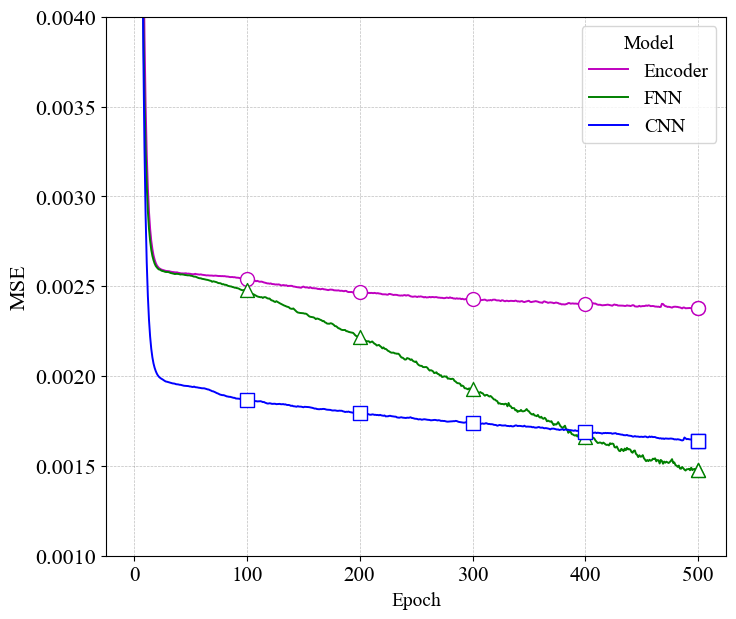

In [5]:

plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman'] + plt.rcParams['font.serif']
plt.rcParams['lines.linewidth'] = 1.4
plt.figure(figsize=(8,7))
#plt.subplot(1,2,1)
plt.ylim(0.001,0.004)
losses1 = np.load('encoder/losses.npy')
plt.plot(losses1[0],smooth_curve(losses1[1]),label="Encoder",color='m')
losses2 = np.load('fnn/losses.npy')
plt.plot(losses2[0],smooth_curve(losses2[1]),label="FNN",color="g")
losses3 = np.load('cnn_basic/losses.npy')
plt.plot(losses3[0],smooth_curve(losses3[1]),label="CNN",color='b')
legend = plt.legend(title = "Model",loc='upper right',fontsize = 14)
plt.setp(legend.get_title(), fontsize=14)
plt.xticks(fontsize=15)

dot_inter(losses1[0],smooth_curve(losses1[1]),100,500,color='m',marker='o')
dot_inter(losses2[0],smooth_curve(losses2[1]),100,500,color='g',marker='^')
dot_inter(losses3[0],smooth_curve(losses3[1]),100,500,color='b',marker='s')



plt.ylabel('MSE',fontsize = 16)
plt.xlabel('Epoch',fontsize = 14)
#plt.yscale('log')
plt.yticks(fontsize=16)
plt.grid(True, linestyle='--', linewidth=0.5, color='gray', alpha=0.5,which='major')
plt.grid(True, linestyle='--', linewidth=0.5, color='gray', alpha=0.5,which="minor", axis='y')
"""
plt.subplot(1,2,2)
plt.ylim(0.001,0.004)
losses = np.load('encoder_rssi/losses.npy')
plt.plot(losses[0],losses[1],label="Encoder")
losses = np.load('fnn_rssi/losses.npy')
plt.plot(losses[0],losses[1],label="FNN")
losses = np.load('crnet/losses.npy')
plt.plot(losses[0],losses[1],label="CNN")
plt.title('CSI + RSSI')
plt.legend(title = "Model",loc='upper right')
plt.ylabel('MSE')
plt.xlabel('Epoch')
"""
plt.savefig('output.png', dpi=300)
plt.show()

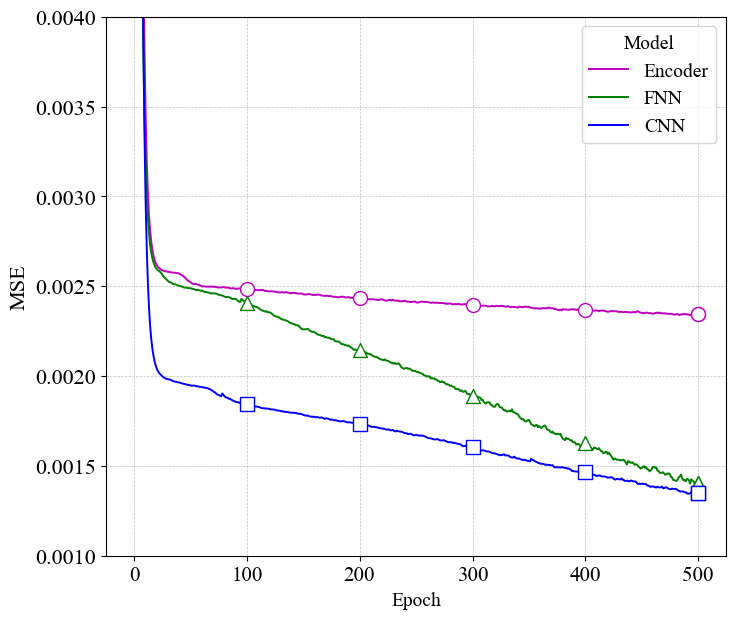

In [32]:

plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman'] + plt.rcParams['font.serif']
plt.rcParams['lines.linewidth'] = 1.4
plt.figure(figsize=(8,7))
#plt.subplot(1,2,1)
plt.ylim(0.001,0.004)
losses1 = np.load('encoder_rssi/losses.npy')
plt.plot(losses1[0],smooth_curve(losses1[1]),label="Encoder",color='m')
losses2 = np.load('fnn_rssi/losses.npy')
plt.plot(losses2[0],smooth_curve(losses2[1]),label="FNN",color="g")
losses3 = np.load('crnet/losses.npy')
plt.plot(losses3[0],smooth_curve(losses3[1]),label="CNN",color='b')
legend = plt.legend(title = "Model",loc='upper right',fontsize = 14)
plt.setp(legend.get_title(), fontsize=14)
plt.xticks(fontsize=15)

dot_inter(losses1[0],smooth_curve(losses1[1]),100,500,color='m',marker='o')
dot_inter(losses2[0],smooth_curve(losses2[1]),100,500,color='g',marker='^')
dot_inter(losses3[0],smooth_curve(losses3[1]),100,500,color='b',marker='s')



plt.ylabel('MSE',fontsize = 16)
plt.xlabel('Epoch',fontsize = 14)
#plt.yscale('log')
plt.yticks(fontsize=16)
plt.grid(True, linestyle='--', linewidth=0.5, color='gray', alpha=0.5,which='major')
plt.grid(True, linestyle='--', linewidth=0.5, color='gray', alpha=0.5,which="minor", axis='y')
"""
plt.subplot(1,2,2)
plt.ylim(0.001,0.004)
losses = np.load('encoder_rssi/losses.npy')
plt.plot(losses[0],losses[1],label="Encoder")
losses = np.load('fnn_rssi/losses.npy')
plt.plot(losses[0],losses[1],label="FNN")
losses = np.load('crnet/losses.npy')
plt.plot(losses[0],losses[1],label="CNN")
plt.title('CSI + RSSI')
plt.legend(title = "Model",loc='upper right')
plt.ylabel('MSE')
plt.xlabel('Epoch')
"""
plt.savefig('output.png', dpi=300)
plt.show()

### testing

#### demo

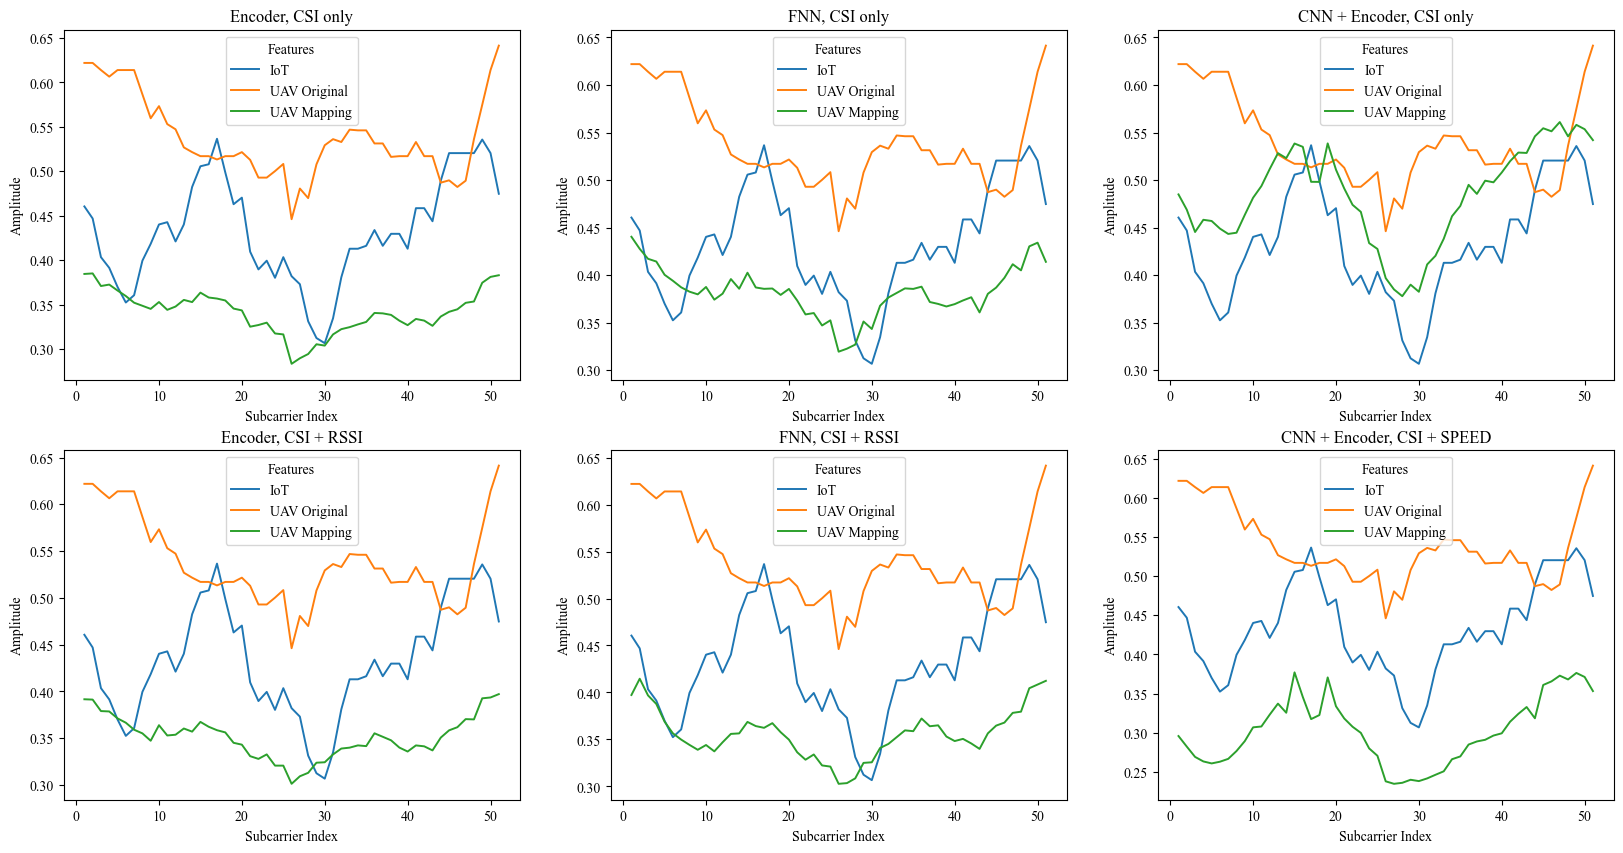

In [57]:
plot_index = 49
plt.figure(figsize=(20,10))

plt.subplot(2,3,1)
testset = np.load("test_set_4/normalized_testing_set_with_speed.npy")
model = torch.load('encoder/model_final.pth')
model.to("cpu")
model.eval()
d_s = csi_dataset(testset)
data, iot_original = d_s.__getitem__(plot_index)
index = torch.from_numpy(np.array([i+1 for i in range(51)]))
uav_original = data
uav_modify = model(data).detach().numpy()
plt.plot(index,iot_original,label = "IoT")
plt.plot(index,uav_original,label = "UAV Original")
plt.plot(index,uav_modify,label = "UAV Mapping")
plt.legend(title = "Features",loc='upper center')
plt.ylabel('Amplitude')
plt.xlabel('Subcarrier Index')
plt.title('Encoder, CSI only')

plt.subplot(2,3,4)
model = torch.load('encoder_rssi/model_final.pth')
model.to("cpu")
model.eval()
d_s = csi_rssi_dataset(testset)
data, iot_original = d_s.__getitem__(plot_index)
index = torch.from_numpy(np.array([i+1 for i in range(51)]))
uav_original = data[1:]
uav_modify = model(data).detach().numpy()
plt.plot(index,iot_original,label = "IoT")
plt.plot(index,uav_original,label = "UAV Original")
plt.plot(index,uav_modify,label = "UAV Mapping")
plt.legend(title = "Features",loc='upper center')
plt.ylabel('Amplitude')
plt.xlabel('Subcarrier Index')
plt.title('Encoder, CSI + RSSI')

plt.subplot(2,3,2)
model = torch.load('fnn/model_final.pth')
model.to("cpu")
model.eval()
d_s = csi_dataset(testset)
data, iot_original = d_s.__getitem__(plot_index)
index = torch.from_numpy(np.array([i+1 for i in range(51)]))
uav_original = data
uav_modify = model(data).detach().numpy()
plt.plot(index,iot_original,label = "IoT")
plt.plot(index,uav_original,label = "UAV Original")
plt.plot(index,uav_modify,label = "UAV Mapping")
plt.legend(title = "Features",loc='upper center')
plt.ylabel('Amplitude')
plt.xlabel('Subcarrier Index')
plt.title('FNN, CSI only')

plt.subplot(2,3,5)
model = torch.load('fnn_rssi/model_final.pth')
model.to("cpu")
model.eval()
d_s = csi_rssi_dataset(testset)
data, iot_original = d_s.__getitem__(plot_index)
index = torch.from_numpy(np.array([i+1 for i in range(51)]))
uav_original = data[1:]
uav_modify = model(data).detach().numpy()
plt.plot(index,iot_original,label = "IoT")
plt.plot(index,uav_original,label = "UAV Original")
plt.plot(index,uav_modify,label = "UAV Mapping")
plt.legend(title = "Features",loc='upper center')
plt.ylabel('Amplitude')
plt.xlabel('Subcarrier Index')
plt.title('FNN, CSI + RSSI')


plt.subplot(2,3,3)
model = torch.load('cnn_basic/model_final.pth')
model.to("cpu")
model.eval()
d_s = csi_cnn_dataset(testset)
data, iot_original = d_s.__getitem__(plot_index)
index = torch.from_numpy(np.array([i+1 for i in range(51)]))
uav_original = data[0][0]
uav_modify = model(data).detach().numpy()
plt.plot(index,iot_original,label = "IoT")
plt.plot(index,uav_original,label = "UAV Original")
plt.plot(index,uav_modify,label = "UAV Mapping")
plt.legend(title = "Features",loc='upper center')
plt.ylabel('Amplitude')
plt.xlabel('Subcarrier Index')
plt.title('CNN + Encoder, CSI only')

plt.subplot(2,3,6)
model = torch.load('cnn_speed/model_final.pth')
model.to("cpu")
model.eval()
d_s = csi_rssi_cnn_dataset(testset)
data, iot_original = d_s.__getitem__(plot_index)
index = torch.from_numpy(np.array([i+1 for i in range(51)]))
uav_original = data[0][0][1:]
uav_modify = model(torch.unsqueeze(data,0)).detach().numpy()
plt.plot(index,iot_original,label = "IoT")
plt.plot(index,uav_original,label = "UAV Original")
plt.plot(index,uav_modify,label = "UAV Mapping")
plt.legend(title = "Features",loc='upper center')
plt.ylabel('Amplitude')
plt.xlabel('Subcarrier Index')
plt.title('CNN + Encoder, CSI + SPEED')



plt.show()

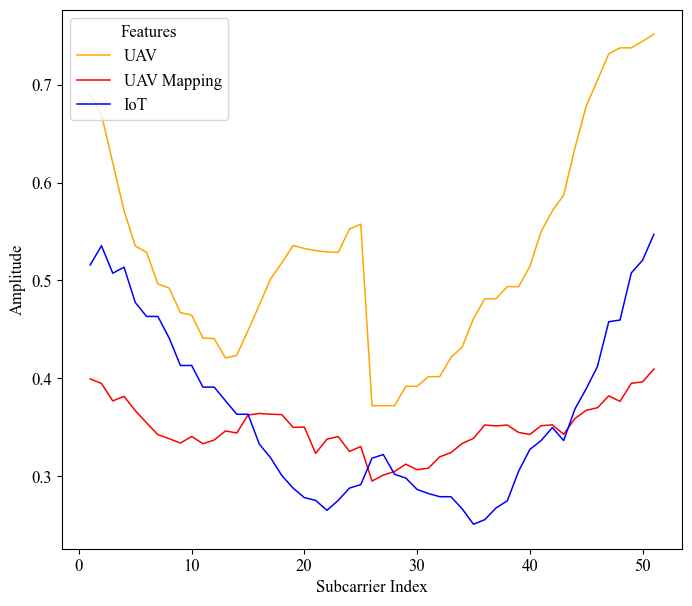

In [34]:
plt.rcParams['lines.linewidth'] = 1.1
plt.rcParams.update({'font.size': 12})
plt.figure(figsize=(8,7))
plot_index = 100
testset = np.load("test_set_3/normalized_testing_set.npy")
model = torch.load('encoder/model100.pth')
model.to("cpu")
model.eval()
d_s = csi_dataset(testset)
data, iot_original = d_s.__getitem__(plot_index)
index = torch.from_numpy(np.array([i+1 for i in range(51)]))
uav_original = data
uav_modify = model(data).detach().numpy()

plt.plot(index,uav_original,label = "UAV",color = 'orange')
plt.plot(index,uav_modify,label = "UAV Mapping",color="red")
plt.plot(index,iot_original,label = "IoT",color="blue")
plt.legend(title = "Features",loc='upper left')
plt.ylabel('Amplitude')
plt.xlabel('Subcarrier Index')
plt.savefig('encoder.png', dpi=300)
plt.show()

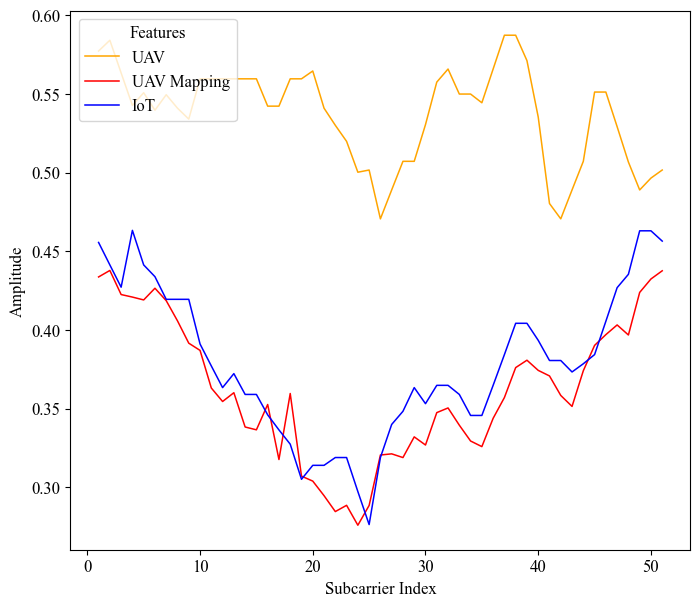

In [35]:
plt.rcParams['lines.linewidth'] = 1.1
plt.rcParams.update({'font.size': 12})
plt.figure(figsize=(8,7))
plot_index = 255
testset = np.load("test_set_3/normalized_testing_set.npy")
model = torch.load('cnn_basic/model100.pth')
model.to("cpu")
model.eval()
d_s = csi_cnn_dataset(testset)
data, iot_original = d_s.__getitem__(plot_index)
index = torch.from_numpy(np.array([i+1 for i in range(51)]))
uav_original = data[0][0]
uav_modify = model(data).detach().numpy()

plt.plot(index,uav_original,label = "UAV",color = 'orange')
plt.plot(index,uav_modify,label = "UAV Mapping",color="red")
plt.plot(index,iot_original,label = "IoT",color="blue")
plt.legend(title = "Features",loc='upper left')
plt.ylabel('Amplitude')
plt.xlabel('Subcarrier Index')
plt.savefig('cnn.png', dpi=300)
plt.show()

#### test mse

In [42]:
import training_core

In [43]:
testset = np.load("test_set_4/normalized_testing_set_with_speed.npy")

test_csi_loader = DataLoader(csi_dataset(testset),batch_size=1)
test_csi_rssi_loader = DataLoader(csi_rssi_dataset(testset),batch_size=1)
test_cnn_loader = DataLoader(csi_cnn_dataset(testset),batch_size=1)
test_rssi_cnn_loader = DataLoader(csi_rssi_cnn_dataset(testset),batch_size=1)

encoder_model = torch.load('encoder/model_final.pth')

encoder_loss = training_core.testing(encoder_model,test_csi_loader)

encoder_rssi_model = torch.load('encoder_rssi/model_final.pth')

encoder_rssi_loss = training_core.testing(encoder_rssi_model,test_csi_rssi_loader)

fnn_model = torch.load('fnn/model_final.pth')

fnn_loss = training_core.testing(fnn_model,test_csi_loader)

fnn_rssi_model = torch.load('fnn_rssi/model_final.pth')

fnn_rssi_loss = training_core.testing(fnn_rssi_model,test_csi_rssi_loader)

cnn_basic_model = torch.load('cnn_basic/model_final.pth')

cnn_basic_loss = training_core.testing(cnn_basic_model,test_cnn_loader)

crnet_model = torch.load('crnet/model_final.pth')

crnet_loss = training_core.testing(crnet_model,test_rssi_cnn_loader)

cnn_speed_model = torch.load('cnn_speed/model_final.pth')

cnn_speed_loss = training_core.testing(cnn_speed_model,test_rssi_cnn_loader)

c:\Users\user\anaconda3\envs\pytorch\lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([1, 51])) that is different to the input size (torch.Size([51])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


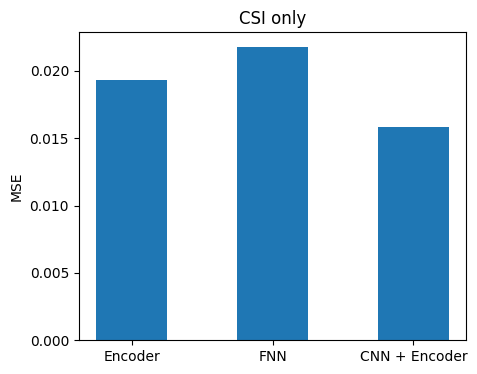

In [18]:
plt.figure(figsize=(5,4))
h = [encoder_loss,fnn_loss,cnn_basic_loss]
x = [i for i in range(3)]
label = ['Encoder','FNN','CNN + Encoder']
plt.bar(x,h,tick_label=label,width=0.5)
plt.ylabel('MSE')
plt.title('CSI only')
plt.show()

In [11]:
def test_mul(folder,d_loader):
    losses = []
    for i in range(100,501,100):
        model_str = folder + '/model'+str(i)+".pth"
        model = torch.load(model_str)
        losses.append(training_core.testing(model,d_loader))
    return losses

In [44]:
testset = np.load("test_set_4/normalized_testing_set_with_speed.npy")

test_csi_loader = DataLoader(csi_dataset(testset),batch_size=16)

test_cnn_loader = DataLoader(csi_cnn_dataset(testset),batch_size=16)

encoder_losses = test_mul('encoder',test_csi_loader)

fnn_losses = test_mul('fnn',test_csi_loader)

cnn_losses = test_mul('cnn_basic',test_cnn_loader)

In [45]:
print(encoder_losses)
print(fnn_losses)
print(cnn_losses)

[0.01923658583313227, 0.01982279881834984, 0.02009409174323082, 0.019564439877867698, 0.01986682154238224]
[0.01972089197486639, 0.020064131692051887, 0.019930647872388362, 0.021080601140856744, 0.020633084252476692]
[0.006725852433592081, 0.008749149544164538, 0.008702447600662709, 0.008933533020317554, 0.009490390373393894]


In [23]:
def dot_inter(x,y,inter,max,color = 'm',marker = '^'):
    for i in range(0,max,inter):
        scatter = plt.scatter(x[i],y[i],edgecolor=color, facecolor='white',marker=marker, s=100, alpha=1.0, zorder=2)

[100, 200, 300, 400, 500]


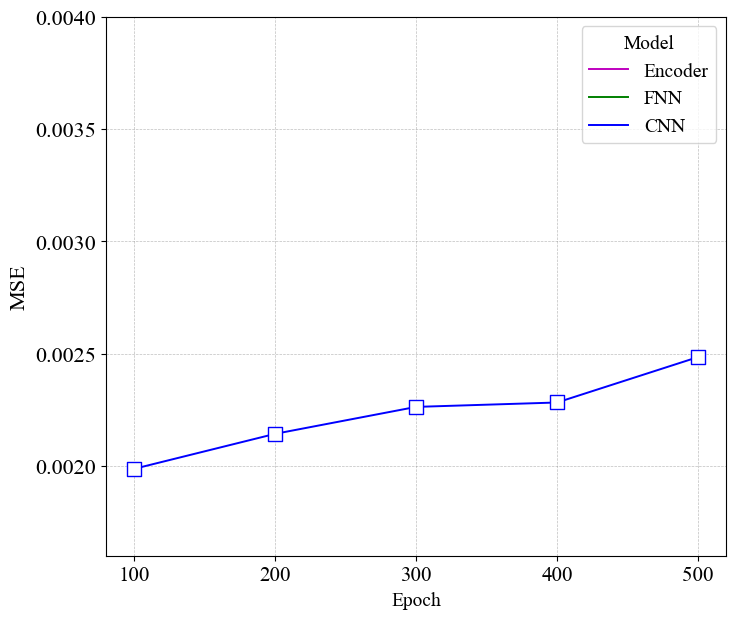

In [43]:
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman'] + plt.rcParams['font.serif']
plt.rcParams['lines.linewidth'] = 1.4
plt.figure(figsize=(8,7))
#plt.subplot(1,2,1)
plt.ylim(0.0016,0.004)
xindex = [i for i in range(100,501,100)]
print(xindex)
losses1 = encoder_losses
plt.plot(xindex,losses1,label="Encoder",color='m')
losses2 =fnn_losses
plt.plot(xindex,losses2,label="FNN",color="g")
losses3 = cnn_losses
plt.plot(xindex,losses3,label="CNN",color='b')
legend = plt.legend(title = "Model",loc='upper right',fontsize = 14)
plt.setp(legend.get_title(), fontsize=14)
plt.xticks(np.arange(0, 501, 100),fontsize=15)

dot_inter(xindex,losses1,1,5,color='m',marker='o')
dot_inter(xindex,losses2,1,5,color='g',marker='^')
dot_inter(xindex,losses3,1,5,color='b',marker='s')



plt.ylabel('MSE',fontsize = 16)
plt.xlabel('Epoch',fontsize = 14)
#plt.yscale('log')
plt.yticks(fontsize=16)
plt.grid(True, linestyle='--', linewidth=0.5, color='gray', alpha=0.5,which='major')
plt.grid(True, linestyle='--', linewidth=0.5, color='gray', alpha=0.5,which="minor", axis='y')

plt.savefig('output1.png', dpi=300)
plt.show()

In [58]:
testset = np.load("test_set_4/normalized_training_set.npy")
hoverset = np.load("test_set_4/normalized_hover_set.npy")
slowset = np.load("test_set_4/normalized_slow_set.npy")
fastset = np.load("test_set_4/normalized_fast_set.npy")

test_csi_loader = DataLoader(csi_dataset(testset),batch_size=1)

test_csi_hover_loader = DataLoader(csi_dataset(hoverset),batch_size=1)

test_csi_slow_loader = DataLoader(csi_dataset(slowset),batch_size=1)

test_csi_fast_loader = DataLoader(csi_dataset(fastset),batch_size=1)

test_cnn_loader = DataLoader(csi_cnn_dataset(testset),batch_size=1)

test_cnn_rssi_loader = DataLoader(csi_rssi_cnn_dataset(testset),batch_size=1)

test_cnn_hover_loader = DataLoader(csi_cnn_dataset(hoverset),batch_size=1)

test_cnn_rssi_hover_loader = DataLoader(csi_rssi_cnn_dataset(hoverset),batch_size=1)

test_cnn_slow_loader = DataLoader(csi_cnn_dataset(slowset),batch_size=1)

test_cnn_rssi_slow_loader = DataLoader(csi_rssi_cnn_dataset(slowset),batch_size=1)

test_cnn_fast_loader = DataLoader(csi_cnn_dataset(fastset),batch_size=1)

test_cnn_rssi_fast_loader = DataLoader(csi_rssi_cnn_dataset(fastset),batch_size=1)

encoder_model = torch.load('encoder/model_final.pth')

encoder_loss = training_core.testing(encoder_model,test_csi_loader)


fnn_model = torch.load('fnn/model_final.pth')

fnn_loss = training_core.testing(fnn_model,test_csi_loader)


cnn_basic_model = torch.load('cnn_basic/model_final.pth')

cnn_basic_loss = training_core.testing(cnn_basic_model,test_cnn_loader)

crnet_model = torch.load('crnet/model_final.pth')

crnet_loss = training_core.testing(crnet_model, test_cnn_rssi_loader)

c:\Users\user\anaconda3\envs\pytorch\lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([1, 51])) that is different to the input size (torch.Size([51])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


In [59]:
speedset = np.load("test_set_4/normalized_speed_set.npy")
hoverspeedset = np.load("test_set_4/normalized_speed_hover_set.npy")
slowspeedset = np.load("test_set_4/normalized_speed_slow_set.npy")
fastspeedset = np.load("test_set_4/normalized_speed_fast_set.npy")

cnn_speed_model = torch.load('cnn_speed/model_final.pth')

test_cnn_loader = DataLoader(csi_cnn_dataset(speedset),batch_size=1)

test_cnn_speed_loader = DataLoader(csi_rssi_cnn_dataset(speedset),batch_size=1)

test_cnn_speed_hover_loader = DataLoader(csi_rssi_cnn_dataset(hoverspeedset),batch_size=1)

test_cnn_speed_slow_loader = DataLoader(csi_rssi_cnn_dataset(slowspeedset),batch_size=1)

test_cnn_speed_fast_loader = DataLoader(csi_rssi_cnn_dataset(fastspeedset),batch_size=1)

cnn_speed_loss = training_core.testing(cnn_speed_model, test_cnn_speed_loader)



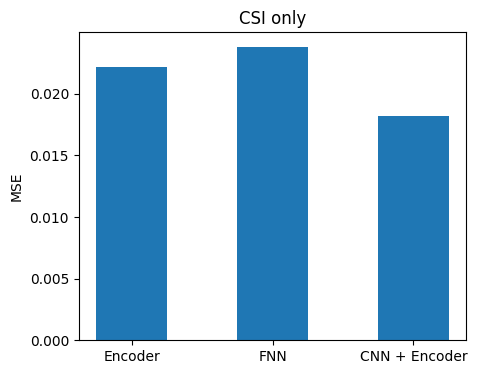

In [45]:
plt.figure(figsize=(5,4))
h = [encoder_loss,fnn_loss,cnn_basic_loss]
x = [i for i in range(3)]
label = ['Encoder','FNN','CNN + Encoder']
plt.bar(x,h,tick_label=label,width=0.5)
plt.ylabel('MSE')
plt.title('CSI only')
plt.show()

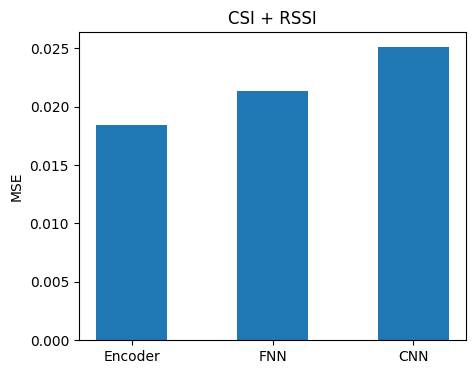

In [27]:
plt.figure(figsize=(5,4))
h = [encoder_rssi_loss,fnn_rssi_loss,crnet_loss]
x = [i for i in range(3)]
label = ['Encoder','FNN','CNN']
plt.bar(x,h,tick_label=label,width=0.5)
plt.ylabel('MSE')
plt.title('CSI + RSSI')
plt.show()

In [46]:
import eval

#encoder
raw_kdr, encoder_kdr  = eval.KDR(encoder_model,test_csi_loader,2,13)
#_,encoder_rssi_kdr = eval.KDR(encoder_rssi_model,test_csi_rssi_loader,2,13)
raw_hover_kdr, encoder_hover_kdr = eval.KDR(encoder_model, test_csi_hover_loader, 2, 13)
raw_slow_kdr, encoder_slow_kdr = eval.KDR(encoder_model, test_csi_slow_loader, 2, 13)
raw_fast_kdr, encoder_fast_kdr = eval.KDR(encoder_model, test_csi_fast_loader, 2, 13)
#fnn
raw_fnn_kdr,fnn_kdr = eval.KDR(fnn_model,test_csi_loader,2,13)
#_,fnn_rssi_kdr = eval.KDR(fnn_rssi_model,test_csi_rssi_loader,2,13)
raw_fnn_hover_kdr, fnn_hover_kdr = eval.KDR(fnn_model, test_csi_hover_loader, 2, 13)
raw_fnn_slow_kdr, fnn_slow_kdr = eval.KDR(fnn_model, test_csi_slow_loader, 2, 13)
raw_fnn_fast_kdr, fnn_fast_kdr = eval.KDR(fnn_model, test_csi_fast_loader, 2, 13)
#cnn
_, cnn_kdr = eval.KDR(cnn_basic_model,test_cnn_loader,2,13)
#_,cnn_rssi_kdr = eval.KDR(crnet_model,test_rssi_cnn_loader,2,13)

_, cnn_hover_kdr = eval.KDR(cnn_basic_model, test_cnn_hover_loader, 2, 13)

_, cnn_slow_kdr = eval.KDR(cnn_basic_model, test_cnn_slow_loader, 2, 13)

_, cnn_fast_kdr = eval.KDR(cnn_basic_model, test_cnn_fast_loader, 2, 13)

_, rssi_hover_kdr = eval.KDR(crnet_model, test_cnn_rssi_hover_loader, 2, 13)

_, rssi_slow_kdr = eval.KDR(crnet_model, test_cnn_rssi_slow_loader, 2, 13)

_, rssi_fast_kdr = eval.KDR(crnet_model, test_cnn_rssi_fast_loader, 2, 13)

print(raw_kdr, raw_hover_kdr, raw_slow_kdr, raw_fast_kdr)

0.16 0.5587262200165426 0.5571895424836601 0.5679012345679012


In [60]:
_, cnn_kdr = eval.KDR(cnn_basic_model,test_cnn_loader,2,13)
_, cnn_speed_kdr = eval.KDR(cnn_speed_model,test_cnn_speed_loader,2,13)
_, cnn_speed_hover_kdr = eval.KDR(cnn_speed_model,test_cnn_speed_hover_loader,2,13)
_, cnn_speed_slow_kdr = eval.KDR(cnn_speed_model,test_cnn_speed_slow_loader,2,13)
_, cnn_speed_fast_kdr = eval.KDR(cnn_speed_model,test_cnn_speed_fast_loader,2,13)

print(cnn_kdr, cnn_speed_kdr, cnn_speed_hover_kdr, cnn_speed_slow_kdr, cnn_speed_fast_kdr)

0.1958876711061803 0.2076338790233091 0.24792513970174962 0.24261840120663727 0.25202343458972587


In [ ]:
plt.figure(figsize=(6,5))
h = [raw_kdr,encoder_kdr,fnn_kdr,cnn_kdr]
x = [i for i in range(4)]
label = ['CNN','Encoder','FNN','CNN']
plt.bar(x,h,tick_label=label,width=0.7)
plt.ylabel('KDR')

plt.show()

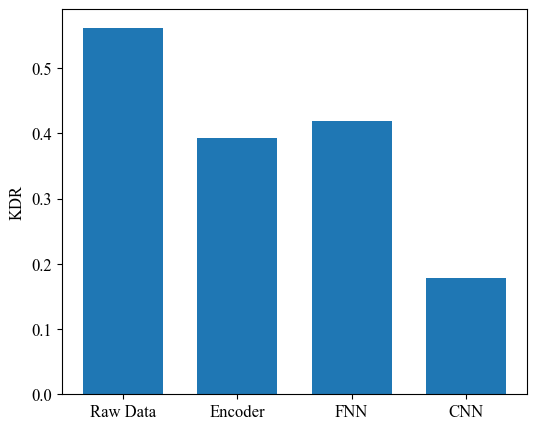

0.562 0.39216993464052347 0.41960784313725374 0.1782424206761748


In [63]:
plt.figure(figsize=(6,5))
h = [raw_kdr,encoder_kdr,fnn_kdr,cnn_kdr]
x = [i for i in range(4)]
label = ['Raw Data','Encoder','FNN','CNN']
plt.bar(x,h,tick_label=label,width=0.7)
plt.ylabel('KDR')

plt.show()
print(raw_kdr,encoder_kdr,fnn_kdr,cnn_kdr)

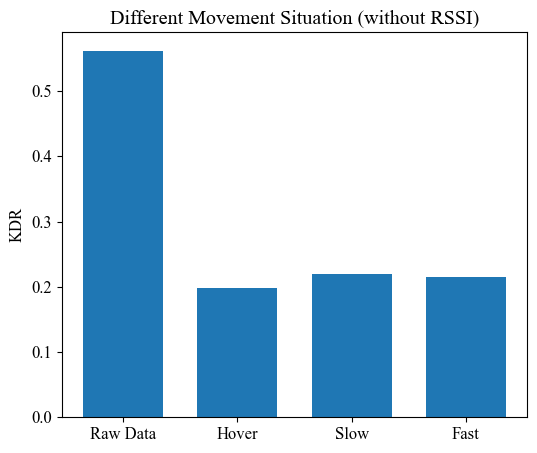

In [60]:
plt.figure(figsize=(6,5))
plt.title("Different Movement Situation (without RSSI)")
h = [raw_kdr, cnn_hover_kdr, cnn_slow_kdr, cnn_fast_kdr]
x = [i for i in range(4)]
label = ['Raw Data','Hover','Slow', 'Fast']
plt.bar(x,h,tick_label=label,width=0.7)
plt.ylabel('KDR')

plt.show()

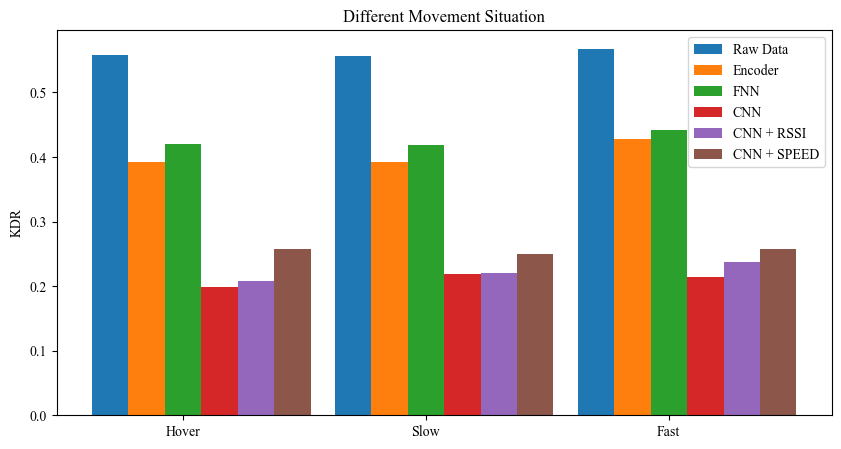

In [35]:
plt.figure(figsize=(10,5))
plt.title("Different Movement Situation")
status = ['Hover','Slow', 'Fast']
raw = [raw_hover_kdr, raw_slow_kdr, raw_fast_kdr]
encoder = [encoder_hover_kdr, encoder_slow_kdr, encoder_fast_kdr]
fnn = [fnn_hover_kdr, fnn_slow_kdr, fnn_fast_kdr]
cnn = [cnn_hover_kdr, cnn_slow_kdr, cnn_fast_kdr]
rssi = [rssi_hover_kdr, rssi_slow_kdr, rssi_fast_kdr]
speed = [cnn_speed_hover_kdr, cnn_speed_slow_kdr, cnn_speed_fast_kdr]
x = np.arange(len(status))
width = 0.15
plt.bar(x - 2*width, raw, width, label='Raw Data')
plt.bar(x - width, encoder, width, label='Encoder')
plt.bar(x, fnn, width, label='FNN')
plt.bar(x + width, cnn, width, label='CNN')
plt.bar(x + 2*width, rssi, width, label='CNN + RSSI')
plt.bar(x + 3*width, speed, width, label='CNN + SPEED')
plt.xticks(x, status)
plt.legend()


plt.ylabel('KDR')

plt.show()

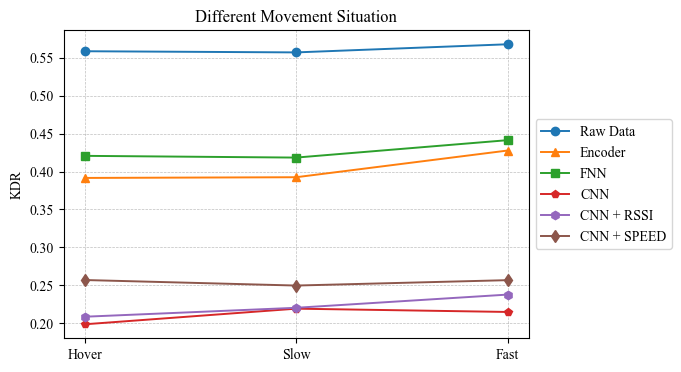

In [36]:
plt.figure(figsize=(6,4))
plt.title("Different Movement Situation")
status = ['Hover','Slow', 'Fast']
raw = [raw_hover_kdr, raw_slow_kdr, raw_fast_kdr]
encoder = [encoder_hover_kdr, encoder_slow_kdr, encoder_fast_kdr]
fnn = [fnn_hover_kdr, fnn_slow_kdr, fnn_fast_kdr]
cnn = [cnn_hover_kdr, cnn_slow_kdr, cnn_fast_kdr]
rssi = [rssi_hover_kdr, rssi_slow_kdr, rssi_fast_kdr]
speed = [cnn_speed_hover_kdr, cnn_speed_slow_kdr, cnn_speed_fast_kdr]
x = np.arange(len(status))
plt.plot(x, raw, label='Raw Data',marker='o')
plt.plot(x, encoder, label='Encoder',marker='^')
plt.plot(x, fnn, label='FNN',marker='s')
plt.plot(x, cnn, label='CNN',marker='p')
plt.plot(x, rssi, label='CNN + RSSI',marker='h')
plt.plot(x, speed, label='CNN + SPEED',marker='d')
plt.xticks(x, status)
#let legend locate at the best position
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid(True, linestyle='--', linewidth=0.5, color='gray', alpha=0.5,which='major')
plt.ylabel('KDR')

plt.show()

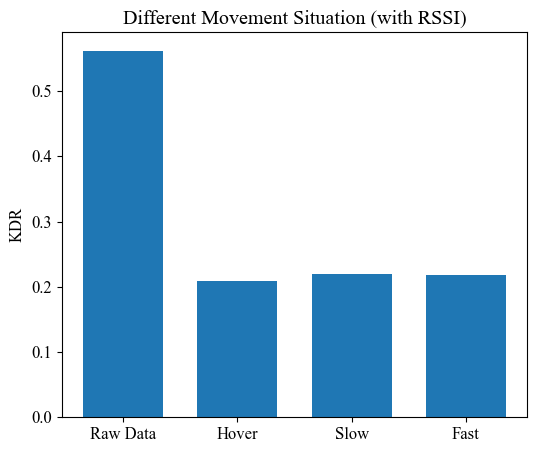

In [52]:
plt.figure(figsize=(6,5))
plt.title("Different Movement Situation (with RSSI)")
h = [raw_kdr, rssi_hover_kdr, rssi_slow_kdr, rssi_fast_kdr]
x = [i for i in range(4)]
label = ['Raw Data','Hover','Slow', 'Fast']
plt.bar(x,h,tick_label=label,width=0.7)
plt.ylabel('KDR')

plt.show()

# CSI only, CNN + Encoder

In [53]:
import eval
raw_kdr_kgr = [eval.KDR(cnn_basic_model,test_cnn_loader,2,13,i)[0] for i in range(10)]
cnn_kdr_kgr = [eval.KDR(cnn_basic_model,test_cnn_loader,2,13,i)[1] for i in range(10)]
fnn_kdr_kgr = [eval.KDR(fnn_model,test_csi_loader,2,13,i)[1] for i in range(10)]
encoder_kdr_kgr = [eval.KDR(encoder_model,test_csi_loader,2,13,i)[1] for i in range(10)]


KeyboardInterrupt: 

In [ ]:
def dot_inter(x,y,inter,max,color = 'm',marker = '^'):
    for i in range(0,max,inter):
        scatter = plt.scatter(x[i],y[i],edgecolor=color, facecolor='white',marker=marker, s=100, alpha=1.0, zorder=2)

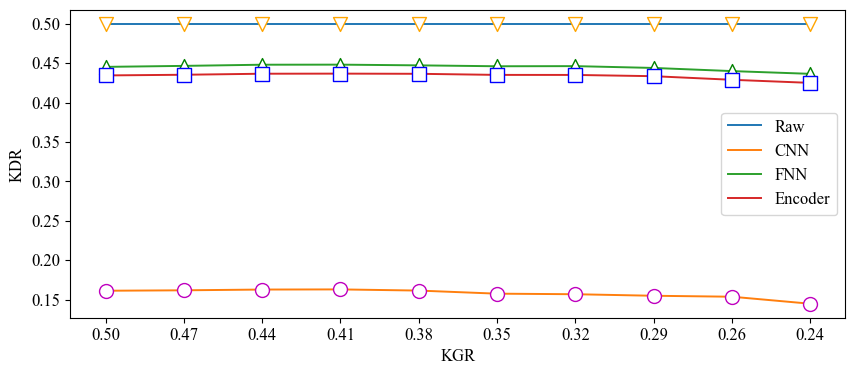

In [ ]:
def KGR(nbit,gaurd):
    return (102-(2**nbit-1)*gaurd*nbit)/(nbit*102)

plt.figure(figsize=(10,4))
x = [i for i in range(10)]
plt.plot(x,raw_kdr_kgr,label='Raw')
plt.plot(x,cnn_kdr_kgr,label='CNN')
plt.plot(x,fnn_kdr_kgr,label="FNN")
plt.plot(x,encoder_kdr_kgr,label="Encoder")

dot_inter(x,raw_kdr_kgr,1,10,color='orange',marker='v')
dot_inter(x,cnn_kdr_kgr,1,10,color='m',marker='o')
dot_inter(x,fnn_kdr_kgr,1,10,color='g',marker='^')
dot_inter(x,encoder_kdr_kgr,1,10,color='b',marker='s')

plt.legend()


label = ["{:.2f}".format(KGR(2,i)) for i in x]

plt.xticks(x,labels=label)
#plt.yscale('log')
#plt.ylim(0.14,0.17)
plt.ylabel('KDR')
plt.xlabel('KGR')


plt.savefig('kgr_kdr.png', dpi=300)
plt.show()

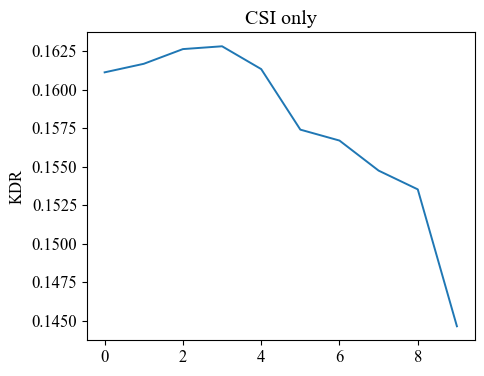

In [ ]:
def KGR(gaurd):
    return (102-3*gaurd)/(2*102)


plt.figure(figsize=(5,4))
h = cnn_kdr_kgr
x = [i for i in range(10)]
label = [str(KGR(i)) for i in x]
plt.plot(x,h)
plt.ylabel('KDR')
plt.title('CSI only')
plt.show()

1954
[[1503, tensor(-80.8515)], [1795, tensor(-79.1507)], [197, tensor(-69.7070)], [1650, tensor(-69.7070)], [1069, tensor(-68.1848)], [187, tensor(-67.7629)], [1652, tensor(-67.4402)], [731, tensor(-67.3034)], [1642, tensor(-67.3034)], [506, tensor(-67.0323)], [167, tensor(-66.0649)], [1643, tensor(-65.8505)], [1103, tensor(-65.3021)], [173, tensor(-65.2189)], [443, tensor(-65.2189)], [1017, tensor(-65.2189)], [1081, tensor(-65.1773)], [673, tensor(-65.0532)], [1607, tensor(-64.6844)], [168, tensor(-64.0817)], [147, tensor(-63.8840)], [156, tensor(-63.8840)], [507, tensor(-63.8840)], [1754, tensor(-63.7661)], [94, tensor(-63.5707)], [1083, tensor(-63.4155)], [1612, tensor(-63.2997)], [154, tensor(-62.6905)], [122, tensor(-62.5403)], [377, tensor(-62.5029)], [1810, tensor(-62.5029)], [489, tensor(-62.2055)], [1651, tensor(-62.2055)], [494, tensor(-62.1686)], [145, tensor(-61.9113)], [490, tensor(-61.5840)], [491, tensor(-61.5840)], [86, tensor(-61.5118)], [522, tensor(-61.5118)], [1847

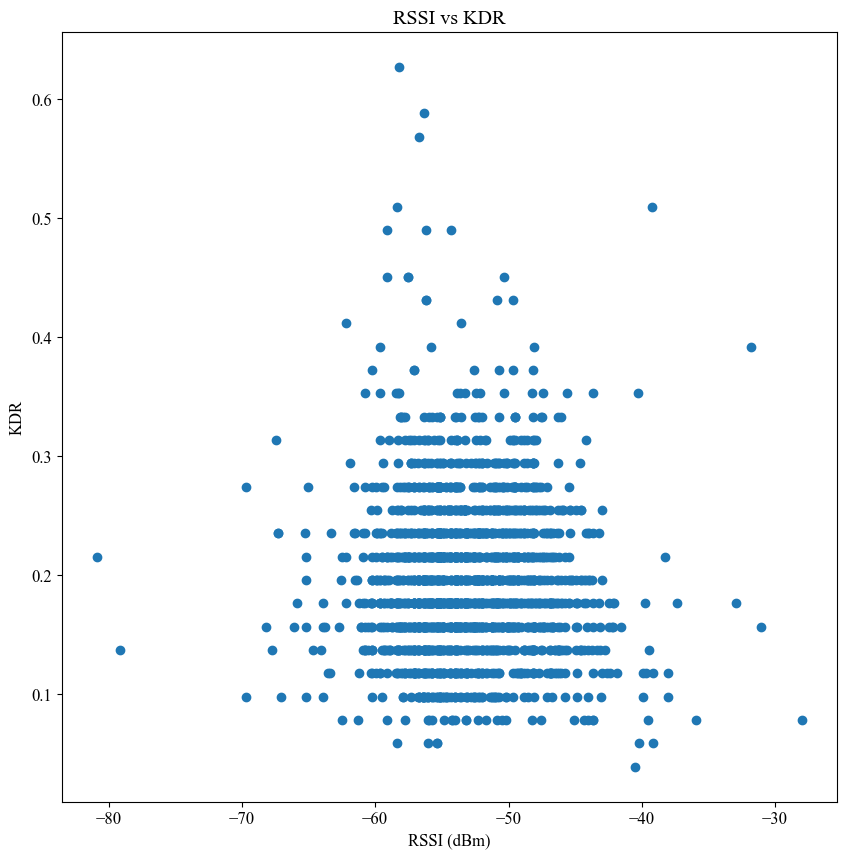

In [ ]:
import greycode_quantization as quan
def kdr(uav,iot):
    uav = list(uav)
    iot = list(iot)
    count = 0
    for u,i in zip(uav,iot):
        if u != i:
            count += 1
    return count/len(uav)


testset = np.load("test_set_3/normalized_testing_set.npy")
trainset = np.load("test_set_3/normalized_training_set.npy")
hoverset = np.load("test_set_3/normalized_hover_set.npy")
model = torch.load('crnet/model_final.pth')
model.to("cpu")
model.eval()
d_s = csi_rssi_cnn_dataset(hoverset)
print(d_s.__len__())

kdr_yjlist = []
rssi_hylist = []

for i in range(1950):
    plot_index = i
    data, iot_original = d_s.__getitem__(plot_index)
    index = torch.from_numpy(np.array([i+1 for i in range(51)]))
    uav_original = data[1:]
    uav_modify = model(torch.unsqueeze(data,0)).detach().numpy()

    uav_modify_squeeze = np.squeeze(uav_modify)
    uav_key = quan.quantization_1(uav_modify_squeeze,2,13,0)

    iot_original_squeeze = np.squeeze(iot_original.detach().numpy())
    iot_key = quan.quantization_1(iot_original_squeeze,2,13,0)

    kdr_yjlist.append([i, kdr(uav_key,iot_key)])
    rssi_hylist.append([i, d_s.__getRssi__(plot_index)[0]*(-28+85)-85])

# print(kdr_yjlist)
# print(rssi_hylist)

rssi_hylist.sort(key = lambda x:x[1])
print(rssi_hylist)

kdr_list = []
for i in rssi_hylist:
    kdr_list.append(kdr_yjlist[i[0]][1])


plt.figure(figsize=(10,10))
plt.scatter([i[1] for i in rssi_hylist],kdr_list)
# plt.scatter([i[1] for i in rssi_hylist],[i[1] for i in kdr_yjlist])
plt.xlabel('RSSI (dBm)')
plt.ylabel('KDR')
plt.title('RSSI vs KDR')
# plt.xlim(-85,-28)
# plt.ylim(0,0.3)
plt.show()

# data, iot_original = d_s.__getitem__(plot_index)
# index = torch.from_numpy(np.array([i+1 for i in range(51)]))
# uav_original = data[0][0][1:]
# uav_modify = model(torch.unsqueeze(data,0)).detach().numpy()

# uav_modify_squeeze = np.squeeze(uav_modify)
# uav_key = quan.quantization_1(uav_modify_squeeze,2,13,0)

# iot_original_squeeze = np.squeeze(iot_original.detach().numpy())
# iot_key = quan.quantization_1(iot_original_squeeze,2,13,0)

# print(kdr(uav_key,iot_key))
# 
